In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import vincenty
%pylab inline
%matplotlib inline 

Populating the interactive namespace from numpy and matplotlib


Reading the files TRI data, Zillow All Homes data, zipcode centroid files

In [2]:

data_tri_2015 = pd.read_csv('data/TRI_2015_NC.csv')
data_zillow_AllHomes = pd.read_csv('data/Zip_Zhvi_4bedroom.csv')
data_region_centroids = pd.read_csv('data/zipcode.csv')

Keeping only the region name and 2015 related columns in the Zillow dataframe.

In [3]:
data_columns = ['RegionName','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12']
data_zillow_AllHomes = data_zillow_AllHomes.loc[:,(data_columns)]

In [4]:
data_tri_2015.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,8.4_RECYCLING_ON-SITE,8.5_RECYCLING_OFF-SITE,8.6_TREATMENT_ON-SITE,8.7_TREATMENT_OFF-SITE,PROD._WASTE_(8.1_THRU_8.7),8.8_ONE-TIME_RELEASE,PROD_RATIO_OR_ACTIVITY,8.9_PRODUCTION_RATIO,PARENT_COMPANY_NAME,PARENT_COMPANY_DB_NUMBER
0,2015,27709JMCSNONEIN,1.100120e+11,JMC (USA) INC,ONE INNOVATION DR,RESEARCH TRIANGLE PARK,DURHAM,NC,27709,NaN,...,0.0,0.0,0.0,0.0,0.00,0.0,NaN,0.00,JAPAN METALS & CHEMICALS CO LTD,NaN
1,2015,2803WBRLCM5CRRE,1.100460e+11,BORAL COMPOSITE INC,500 CORRELL ST,EAST SPENCER,ROWAN,NC,28039,NaN,...,0.0,0.0,0.0,0.0,140.00,NaN,PRODUCTION,1.12,BORAL USA,NaN
2,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,0.0,0.0,0.0,0.0,77.33,NaN,PRODUCTION,1.10,ALLEGHENY TECHNOLOGIES INC,949262737.0
3,2015,28328CMPBL224FA,1.100000e+11,CAMPBELL OIL & GAS CO,224 FAISON HWY,CLINTON,SAMPSON,NC,28328,NaN,...,0.0,0.0,0.0,0.0,0.00,NaN,ACTIVITY,1.00,CAMPBELL OIL & GAS CO,NaN
4,2015,28456FDRLPRIEGE,1.100100e+11,INTERNATIONAL PAPER RIEGELWOOD MILL,865 JOHN L.RIEGEL RD,RIEGELWOOD,COLUMBUS,NC,28456,NaN,...,0.0,0.0,0.0,0.0,37080.00,NaN,PRODUCTION,0.97,INTERNATIONAL PAPER CO,1316561.0


Renaming the column name from RegionName to ZIP - to make it compatible to merge with the TRI dataframe.
Renaming the latitude column name to CENTROID_LATITUDE, longitude to CENTROID_LONGITUDE, to keep the names more meaningful.
Keeping only the relevant useful columns from the actual dataframe.

In [5]:
data_zillow_AllHomes.rename(columns={'RegionName':'ZIP'},inplace=True)

In [6]:
data_region_centroids.rename(columns = {'zip':'ZIP','latitude':'CENTROID_LATITUDE','longitude':'CENTROID_LONGITUDE'},inplace=True)

In [7]:
data_columns1 = ['ZIP','CENTROID_LATITUDE','CENTROID_LONGITUDE']
data_region_centroids = data_region_centroids.loc[:,(data_columns1)]

In [8]:
data_zillow_AllHomes.head()

,ZIP,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,60657,840800,842300,849900,865100.0,883000,887100,882200,885100,887000.0,884800,889000,894600
1,60614,1084700,1083000,1083600,1100800.0,1118800,1116300,1109500,1105100,1096500.0,1084000,1080700,1080400
2,79936,151500,152800,153700,153700.0,152500,151300,150900,150800,150900.0,151200,151500,152000
3,60640,549500,549900,557100,568600.0,577500,579900,575500,573500,576600.0,586200,595600,607800
4,77084,166200,167500,169100,171300.0,172500,172900,174200,175900,176400.0,176800,177800,179000


Merge the TRI and Zillow_allHomes dataframes

In [9]:
data_common_tri_zillow = pd.merge(data_tri_2015,data_zillow_AllHomes)

In [10]:
data_common_tri_zillow.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,205600,207100.0,209700,211300,212400,214100,216100.0,217100,218000,219400
1,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,205600,207100.0,209700,211300,212400,214100,216100.0,217100,218000,219400
2,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,205600,207100.0,209700,211300,212400,214100,216100.0,217100,218000,219400
3,2015,2811WTLLVC375AL,1.100190e+11,ATI ALLVAC - BAKERS SITE,3750 ALLOY WAY,MONROE,UNION,NC,28110,NaN,...,205600,207100.0,209700,211300,212400,214100,216100.0,217100,218000,219400
4,2015,2811WCNCRT119NS,1.100010e+11,CONCRETE SUPPLY CO LLC-MONROE,1109 N SUTHERLAND RD,MONROE,UNION,NC,28110,NaN,...,205600,207100.0,209700,211300,212400,214100,216100.0,217100,218000,219400


Merge the TRI_Zillow merged dataframe with the data_centroid dataframe

In [11]:
data_common_tri_zillow_centroid = pd.merge(data_common_tri_zillow,data_region_centroids)

In [12]:
data_common_tri_zillow_centroid.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,209700,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002
1,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,209700,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002
2,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,209700,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002
3,2015,2811WTLLVC375AL,1.100190e+11,ATI ALLVAC - BAKERS SITE,3750 ALLOY WAY,MONROE,UNION,NC,28110,NaN,...,209700,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002
4,2015,2811WCNCRT119NS,1.100010e+11,CONCRETE SUPPLY CO LLC-MONROE,1109 N SUTHERLAND RD,MONROE,UNION,NC,28110,NaN,...,209700,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002


In [13]:
data_common_tri_zillow_centroid.dropna(subset=['LATITUDE','LONGITUDE','CENTROID_LATITUDE','CENTROID_LONGITUDE'],inplace=True)
data_common_tri_zillow_centroid.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,209700,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002
1,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,209700,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002
2,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,209700,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002
3,2015,2811WTLLVC375AL,1.100190e+11,ATI ALLVAC - BAKERS SITE,3750 ALLOY WAY,MONROE,UNION,NC,28110,NaN,...,209700,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002
4,2015,2811WCNCRT119NS,1.100010e+11,CONCRETE SUPPLY CO LLC-MONROE,1109 N SUTHERLAND RD,MONROE,UNION,NC,28110,NaN,...,209700,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002


Define a function "calculate_distance" used to calculate the distance between the facility and the centorid of the zip that the facility is located in.

In [14]:
def calculate_distance(df):
    return vincenty((df['LATITUDE'],df['LONGITUDE']),(df['CENTROID_LATITUDE'],df['CENTROID_LONGITUDE'])).miles
    

Apply the "calculate_distance" function to each facility in the dataframe and add a new column 'DIST_FROM_CENTROID' storing the calculated value for each facility.

In [15]:
data_common_tri_zillow_centroid['DIST_FROM_CENTROID']=data_common_tri_zillow_centroid.apply(calculate_distance,axis=1)



The new column values for DIST_FROM_CENTROID look as below

In [16]:
data_common_tri_zillow_centroid[['LATITUDE','LONGITUDE','CENTROID_LATITUDE','CENTROID_LONGITUDE','DIST_FROM_CENTROID']]

,LATITUDE,LONGITUDE,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID
0,34.985480,-80.517139,35.031947,-80.56002,4.021916
1,34.995550,-80.497710,35.031947,-80.56002,4.333998
2,34.995550,-80.497710,35.031947,-80.56002,4.333998
3,35.018030,-80.612762,35.031947,-80.56002,3.140923
4,34.995580,-80.527970,35.031947,-80.56002,3.096601
5,35.025980,-80.604130,35.031947,-80.56002,2.534804
6,34.985480,-80.517139,35.031947,-80.56002,4.021916
7,34.995550,-80.497710,35.031947,-80.56002,4.333998
8,34.997360,-80.560010,35.031947,-80.56002,2.384270
9,34.987520,-80.497780,35.031947,-80.56002,4.673424


In [17]:
data_common_tri_zillow_centroid.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID
0,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,4.021916
1,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,4.333998
2,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,4.333998
3,2015,2811WTLLVC375AL,1.100190e+11,ATI ALLVAC - BAKERS SITE,3750 ALLOY WAY,MONROE,UNION,NC,28110,NaN,...,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,3.140923
4,2015,2811WCNCRT119NS,1.100010e+11,CONCRETE SUPPLY CO LLC-MONROE,1109 N SUTHERLAND RD,MONROE,UNION,NC,28110,NaN,...,211300,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,3.096601


Calculate the mean of house prices through the months of 2015 and store in AVG_PRICE column. 

In [18]:
cols=['2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12']
data_common_tri_zillow_centroid['AVG_PRICE'] = data_common_tri_zillow_centroid[cols].mean(axis=1)
data_common_tri_zillow_centroid

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID,AVG_PRICE
0,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,4.021916,211891.666667
1,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,4.333998,211891.666667
2,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,4.333998,211891.666667
3,2015,2811WTLLVC375AL,1.100190e+11,ATI ALLVAC - BAKERS SITE,3750 ALLOY WAY,MONROE,UNION,NC,28110,NaN,...,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,3.140923,211891.666667
4,2015,2811WCNCRT119NS,1.100010e+11,CONCRETE SUPPLY CO LLC-MONROE,1109 N SUTHERLAND RD,MONROE,UNION,NC,28110,NaN,...,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,3.096601,211891.666667
5,2015,28110PRNTW2011R,1.100000e+11,OMNOVA SOLUTIONS INC,2011 ROCKY RIVER RD,MONROE,UNION,NC,28110,NaN,...,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,2.534804,211891.666667
6,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,4.021916,211891.666667
7,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,4.333998,211891.666667
8,2015,28110CNSLD780PA,1.100000e+11,CONSOLIDATED METCO INC,780 PATTON AVE,MONROE,UNION,NC,28110,NaN,...,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,2.384270,211891.666667
9,2015,28110LDWGN2806M,1.100010e+11,CONN-SELMER INC LUDWIG FACILITY,2806 MASON ST,MONROE,UNION,NC,28110,NaN,...,212400,214100,216100.0,217100,218000,219400,35.031947,-80.56002,4.673424,211891.666667


Looking for facilities whose distance from the centroid DIST_FROM_CENTROID is less than 1 mile, storing it in data_within_1_mile

In [19]:
data_within_1_mile=data_common_tri_zillow_centroid[data_common_tri_zillow_centroid.DIST_FROM_CENTROID<1]

In [20]:
data_within_1_mile.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID,AVG_PRICE
76,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,561800,562500,558400.0,560400,566600,564700,35.585074,-80.96141,0.89163,550216.666667
77,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,561800,562500,558400.0,560400,566600,564700,35.585074,-80.96141,0.89163,550216.666667
78,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,561800,562500,558400.0,560400,566600,564700,35.585074,-80.96141,0.89163,550216.666667
79,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,561800,562500,558400.0,560400,566600,564700,35.585074,-80.96141,0.89163,550216.666667
80,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,561800,562500,558400.0,560400,566600,564700,35.585074,-80.96141,0.89163,550216.666667


Trying to plot the sum of on-site-release-total grouping by each chemical. We notice that the most on-site-release-total is being released by the below mentioned chemicals.
first - Methanol, second - Sulphuric Acid, third - Manganese compounds.

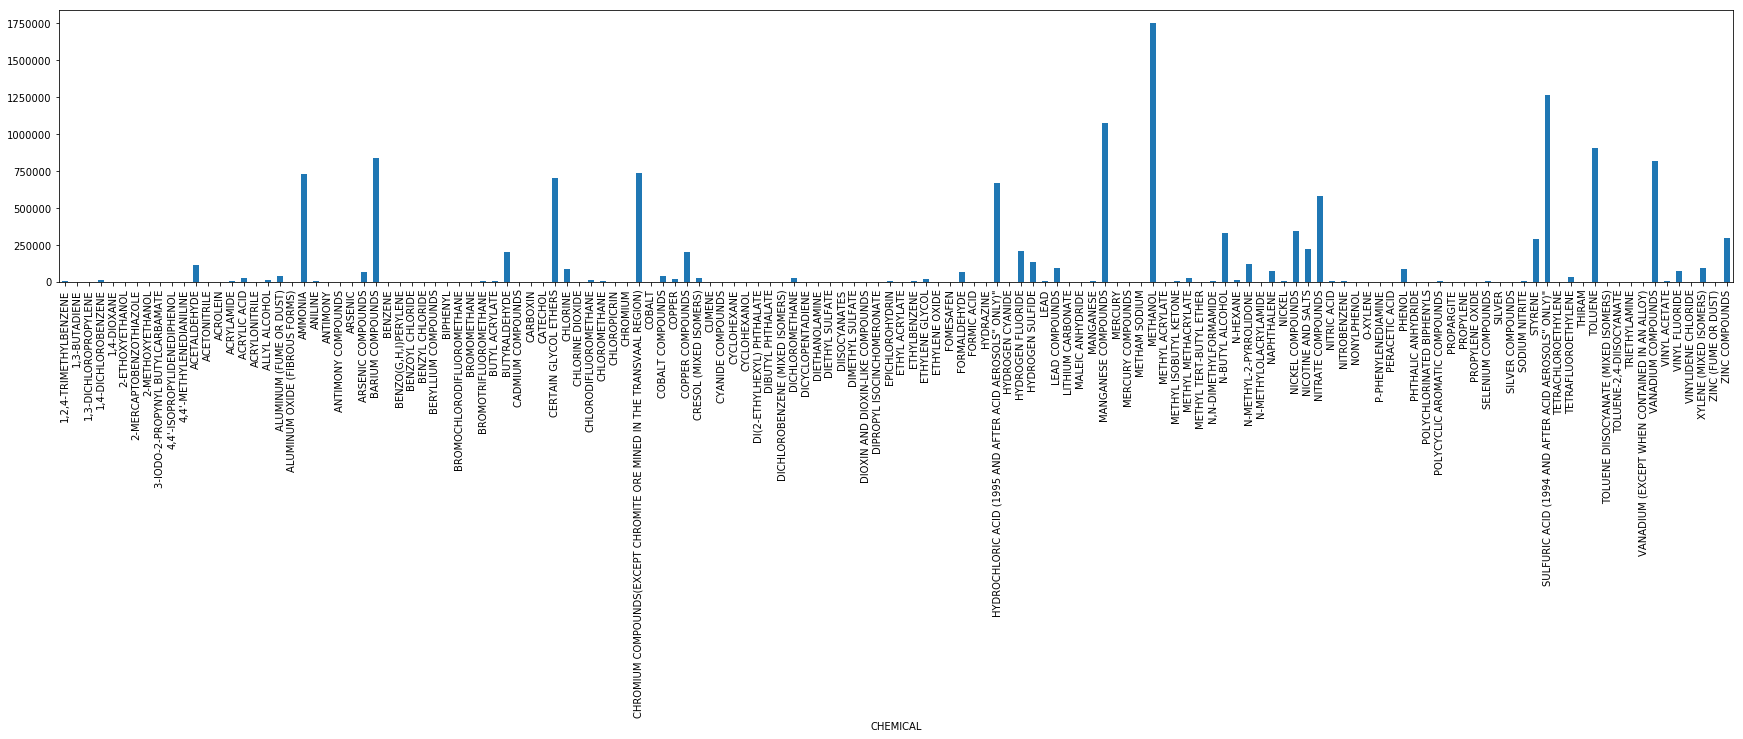

In [21]:
data_common_tri_zillow_centroid.groupby(['CHEMICAL'])['ON-SITE_RELEASE_TOTAL'].agg('sum').plot(x='CHEMICAL',y='sum',kind = 'bar',figsize=(30,5))

For all those facilities whose ON-SITE_RELEASE_TOTAL is greater than 0, I'm trying to group by chemical and calculate the mean of average prices of the places. the graph shows that the mean of average price is highest at the chemical ANTIMONY. (Yet to figure out if this information reveals any inference to the correlation of housing prices)

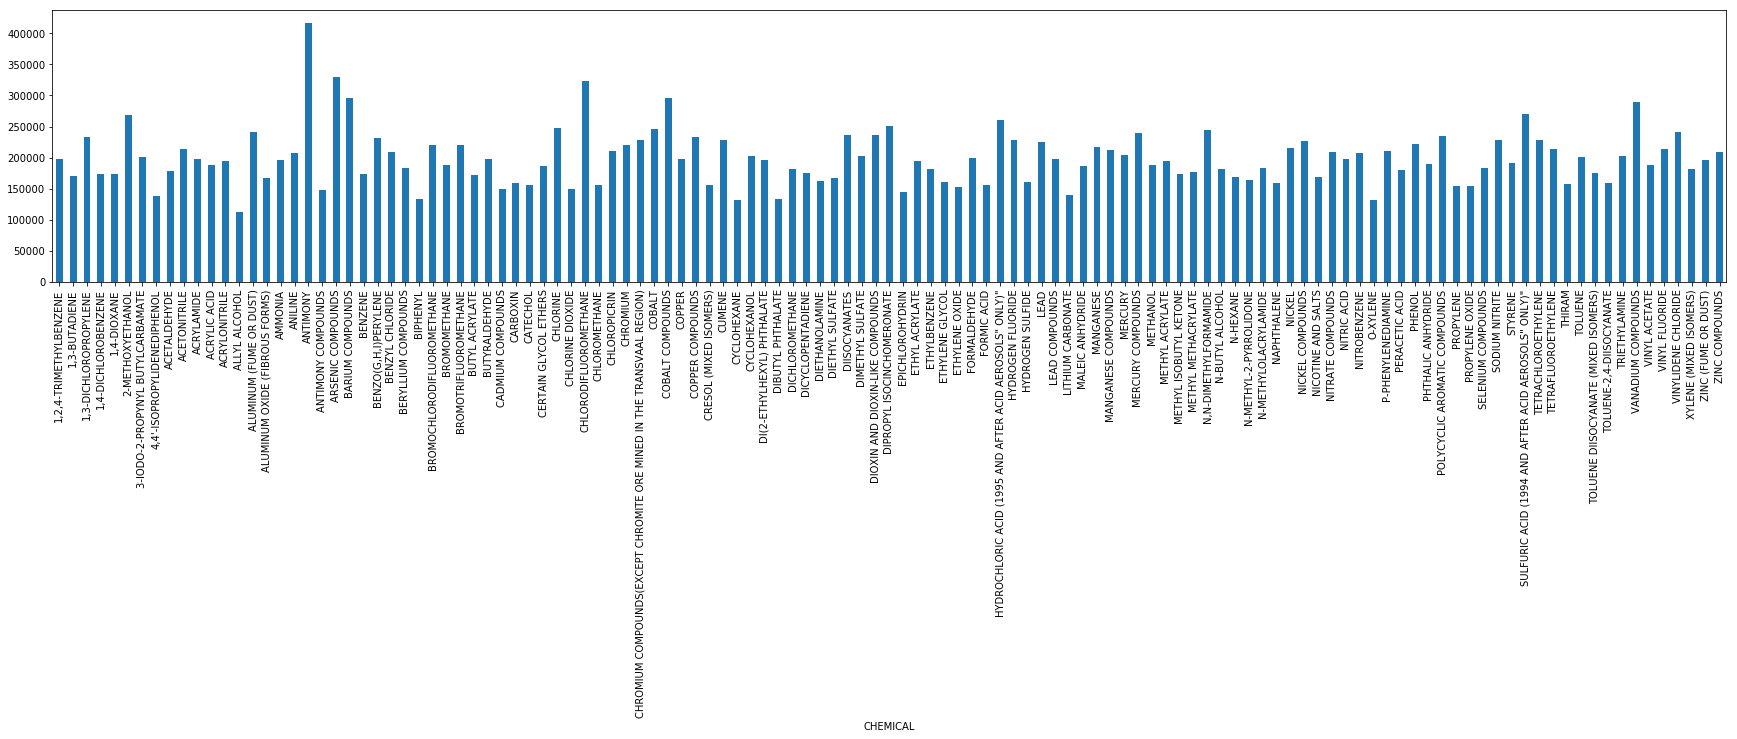

In [22]:
data_common_tri_zillow_centroid[data_common_tri_zillow_centroid['ON-SITE_RELEASE_TOTAL']>0].groupby(['CHEMICAL'])['AVG_PRICE'].agg('mean').plot(x='CHEMICAL',y='AVG_PRICE',kind = 'bar',figsize=(30,5))

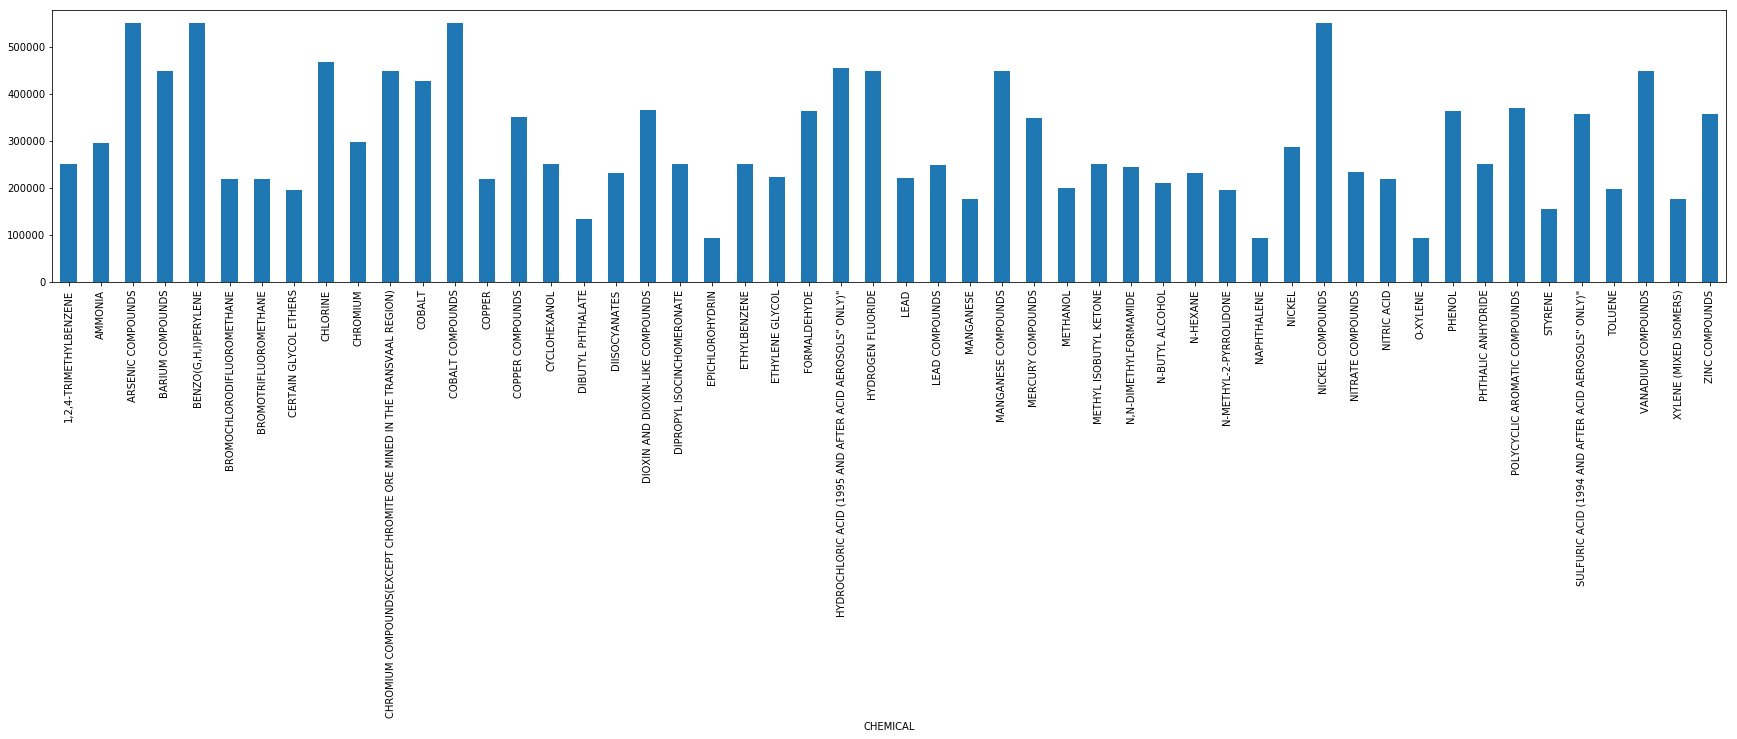

In [23]:
data_within_1_mile[data_within_1_mile['ON-SITE_RELEASE_TOTAL']>0].groupby(['CHEMICAL'])['AVG_PRICE'].agg('mean').plot(x='CHEMICAL',y='AVG_PRICE',kind = 'bar',figsize=(30,5))

Trying to plot the sum of on-site-release-total grouping by each Carcinogenic chemical . We notice that the most on-site-release-total is being released by the chemical first - Styrene, second - Acetaldehyde, third - Formaldehyde.

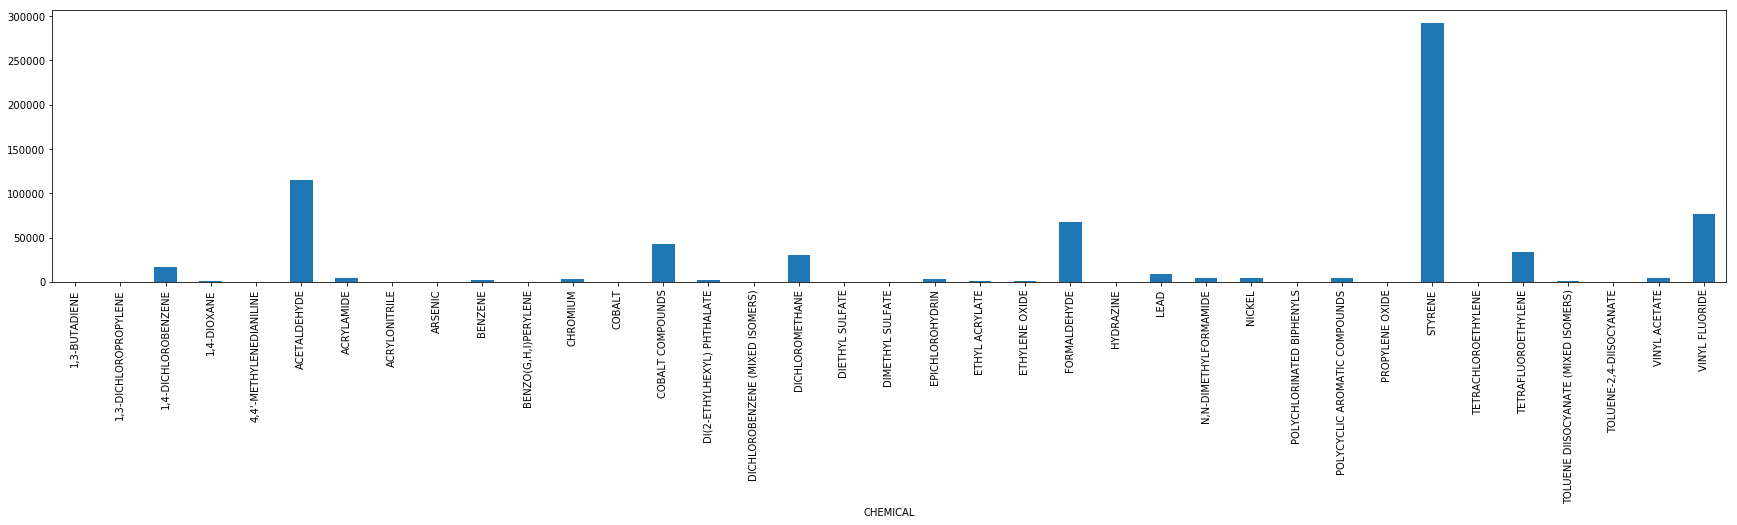

In [24]:
data_common_tri_zillow_centroid1 = data_common_tri_zillow_centroid[data_common_tri_zillow_centroid.CARCINOGEN == 'YES']

data_common_tri_zillow_centroid1.groupby(['CHEMICAL'])['ON-SITE_RELEASE_TOTAL'].agg('sum').plot(x='CHEMICAL',y='sum',kind = 'bar',figsize=(30,5))

For the facilities within 1 mile of centroid, Plot the sum of ON-SITE_RELEASE_TOTAL grouped by TRI_FACILITY_ID,INDUSTRY_SECTOR.We can notice that 28704SHVLL200CP, Electric Utilities shows the highest Onsite Release total.

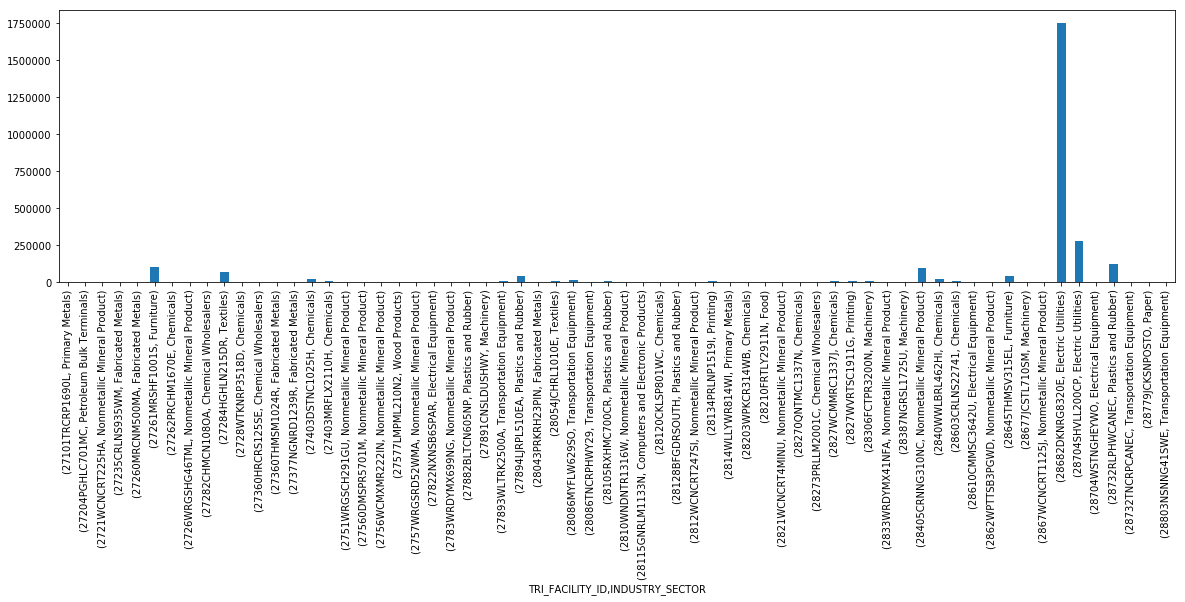

In [25]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <1)].groupby(['TRI_FACILITY_ID','INDUSTRY_SECTOR'])['ON-SITE_RELEASE_TOTAL'].agg('sum').plot(x='INDUSTRY_SECTOR',y='sum',kind = 'bar',figsize=(20,5))

For the facilities within 1 mile of centroid, Plot the sum of ON-SITE_RELEASE_TOTAL grouped by CHEMICAL.We can notice that Baruim Compounds shows the highest Onsite Release total.



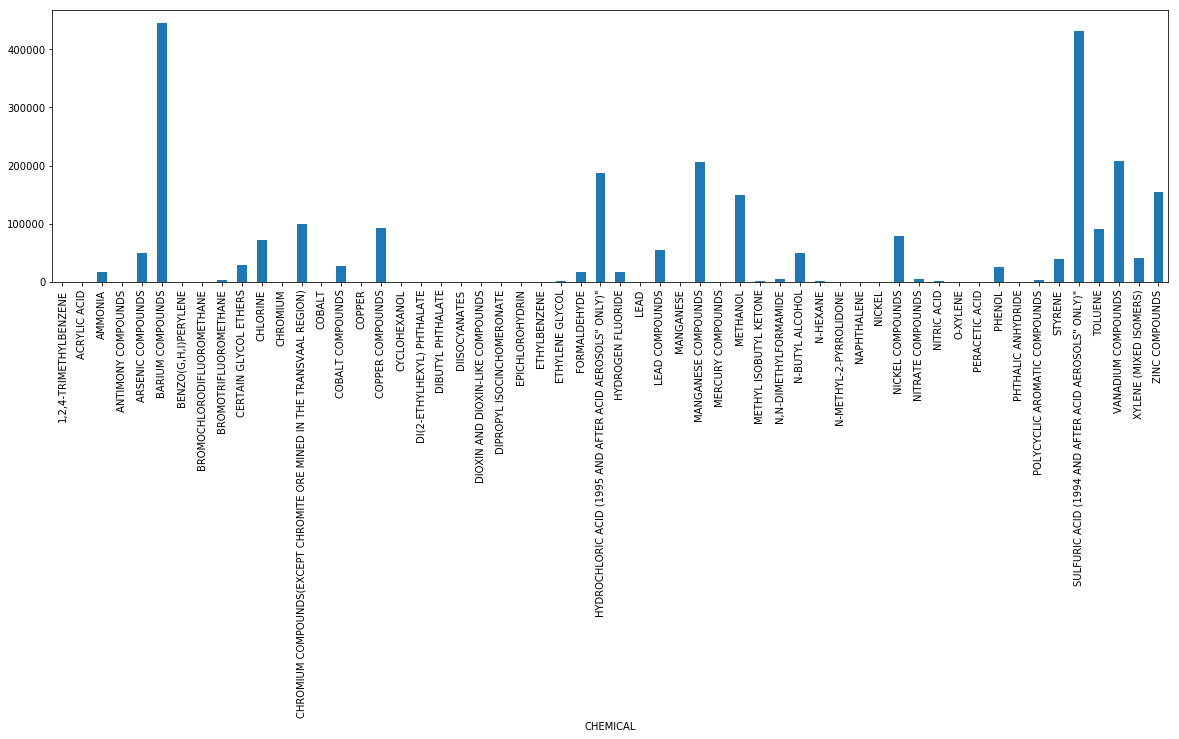

In [26]:
data_within_1_mile.groupby(['CHEMICAL'])['ON-SITE_RELEASE_TOTAL'].agg('sum').plot(x='CHEMICAL',y='sum',kind = 'bar',figsize=(20,5))

For the facilities within 2 mile of centroid, Plot the sum of ON-SITE_RELEASE_TOTAL grouped by TRI_FACILITY_ID,INDUSTRY_SECTOR.We can notice that 28704SHVLL200CP, Electric Utilities shows the highest Onsite Release total.

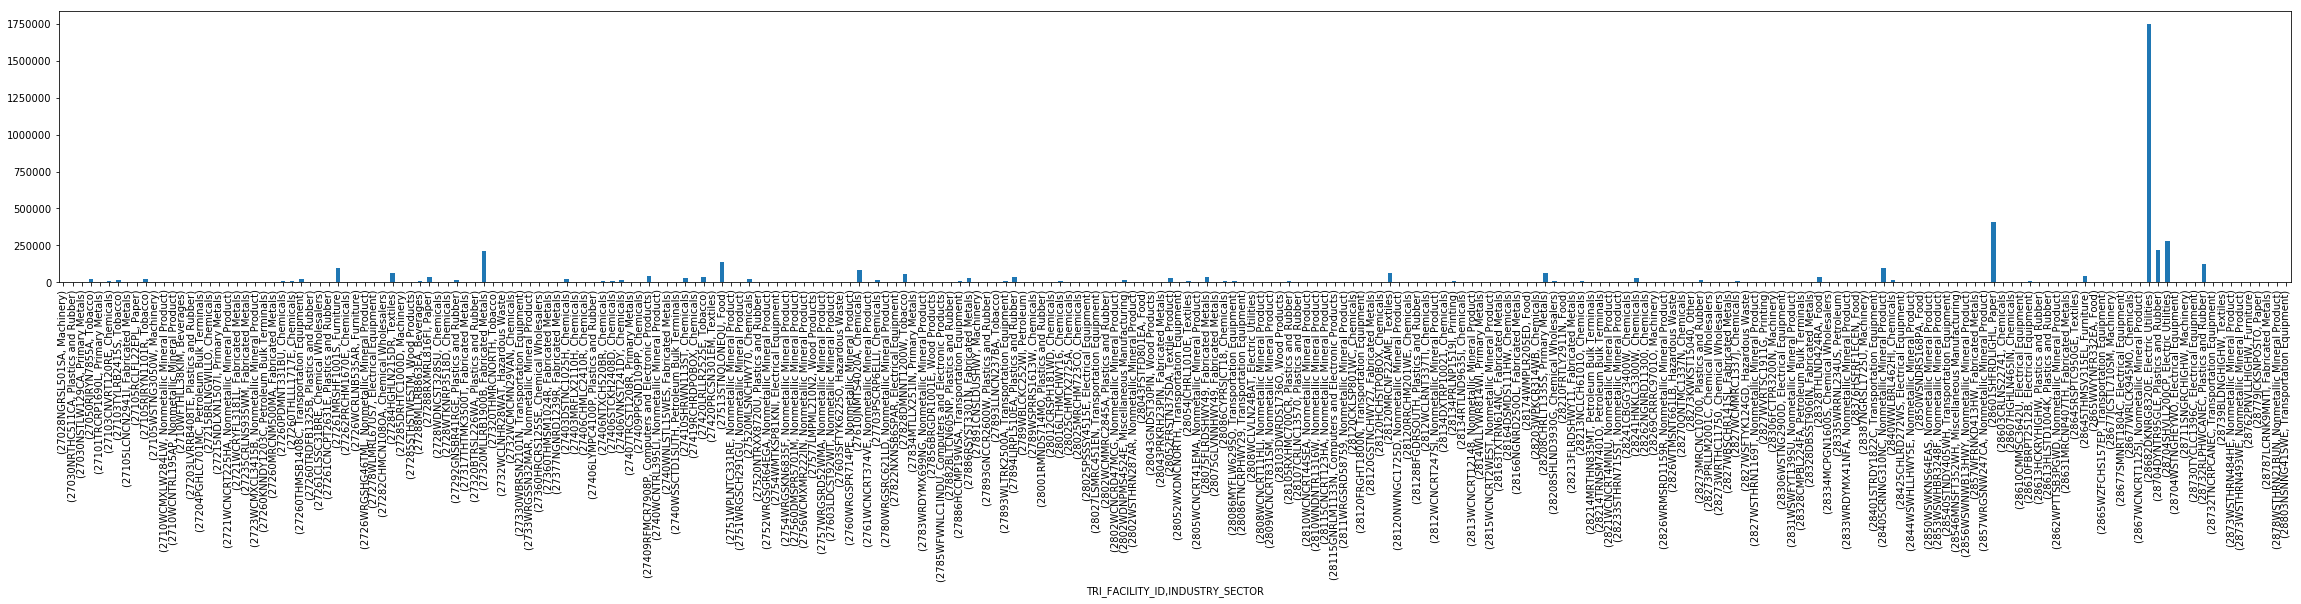

In [27]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <2)].groupby(['TRI_FACILITY_ID','INDUSTRY_SECTOR'])['ON-SITE_RELEASE_TOTAL'].agg('sum').plot(x='INDUSTRY_SECTOR',y='sum',kind = 'bar',figsize=(40,5))

Plotted the values of INDUSTRY_SECTOR and mean of the AVG PRICE of houses for a distance range 1,2,3,4,5 miles from the centroid, in the below graphs. The results are as seen

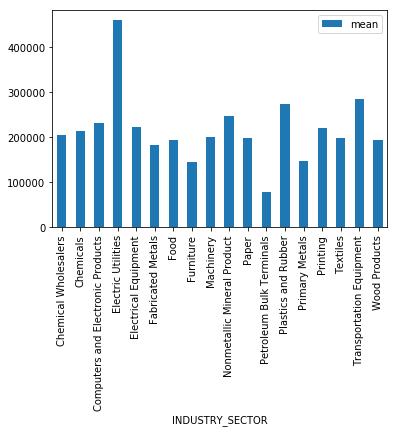

In [28]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <1)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

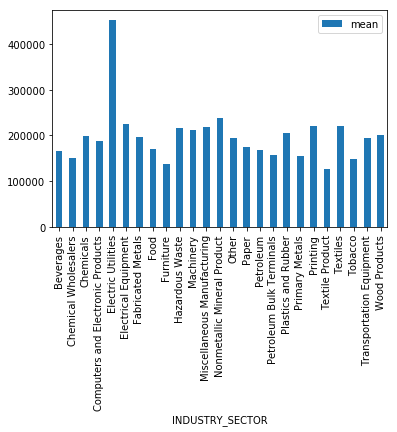

In [29]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <2)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

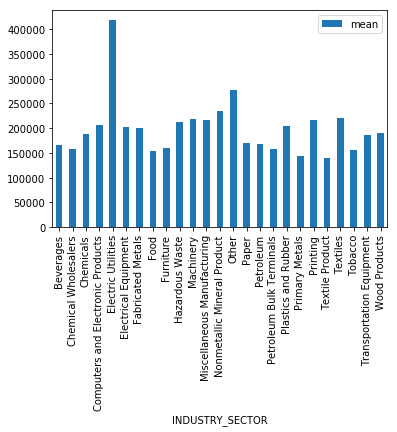

In [30]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <3)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

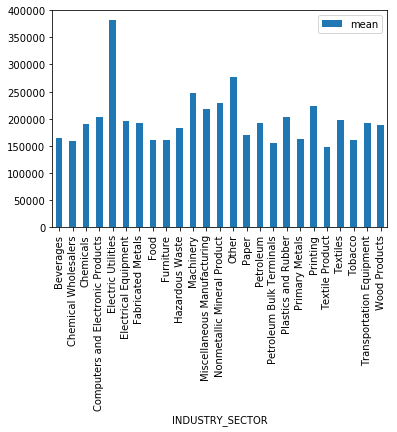

In [31]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <4)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

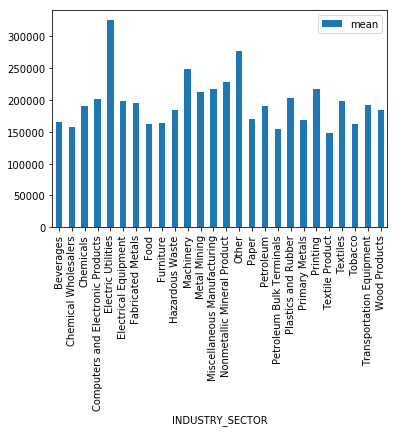

In [32]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <5)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

Here, the top carcinogen On-site-releasing Industry sectors are grouped and the top five on-site-releaasind totals are observed as to how the average house prices vary with distance from these factories.

In [ ]:
newdf=pd.DataFrame(data_common_tri_zillow_centroid[data_common_tri_zillow_centroid['CARCINOGEN']== 'YES'].groupby('INDUSTRY_SECTOR')['ON-SITE_RELEASE_TOTAL'].agg('sum').nlargest(4))
newdf

In [39]:
columns= newdf.index.values.tolist()
columns

['Plastics and Rubber', 'Transportation Equipment', 'Chemicals', 'Paper']

In [40]:
data_common_tri_zillow_centroid3=data_common_tri_zillow_centroid[data_common_tri_zillow_centroid['INDUSTRY_SECTOR'].isin(columns)]
data_common_tri_zillow_centroid3

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID,AVG_PRICE
36,2015,28012CRSPH181WD,1.100310e+11,CARUS CORP BELMONT SITE,181 WOODLAWN AVE,BELMONT,GASTON,NC,28012,NaN,...,297900,298400,298300.0,298200,298800,299800,35.240600,-81.04028,1.991895,296416.666667
52,2015,27610JNMTS4020A,1.100000e+11,AJINOMOTO NA INC,4020 AJINOMOTO DR,RALEIGH,WAKE,NC,27610,NaN,...,171000,171400,172300.0,173200,173600,173600,35.767829,-78.58610,1.149072,169875.000000
53,2015,27610JNMTS4020A,1.100000e+11,AJINOMOTO NA INC,4020 AJINOMOTO DR,RALEIGH,WAKE,NC,27610,NaN,...,171000,171400,172300.0,173200,173600,173600,35.767829,-78.58610,1.149072,169875.000000
58,2015,27410SHRWN113ST,1.100000e+11,SHERWIN-WILLIAMS CO,113 STAGE COACH TRAIL,GREENSBORO,GUILFORD,NC,27409,NaN,...,182900,184200,184600.0,184000,183800,184000,36.083885,-79.94122,1.681444,181433.333333
60,2015,27419RCHRDPOBOX,1.100000e+11,THE PROCTER & GAMBLE MANUFACTURING CO,100 SWING RD,GREENSBORO,GUILFORD,NC,27409,NaN,...,182900,184200,184600.0,184000,183800,184000,36.083885,-79.94122,1.871692,181433.333333
62,2015,27410SHRWN113ST,1.100000e+11,SHERWIN-WILLIAMS CO,113 STAGE COACH TRAIL,GREENSBORO,GUILFORD,NC,27409,NaN,...,182900,184200,184600.0,184000,183800,184000,36.083885,-79.94122,1.681444,181433.333333
63,2015,27410SHRWN113ST,1.100000e+11,SHERWIN-WILLIAMS CO,113 STAGE COACH TRAIL,GREENSBORO,GUILFORD,NC,27409,NaN,...,182900,184200,184600.0,184000,183800,184000,36.083885,-79.94122,1.681444,181433.333333
64,2015,27410SHRWN113ST,1.100000e+11,SHERWIN-WILLIAMS CO,113 STAGE COACH TRAIL,GREENSBORO,GUILFORD,NC,27409,NaN,...,182900,184200,184600.0,184000,183800,184000,36.083885,-79.94122,1.681444,181433.333333
65,2015,27409KYCHM8300C,1.100000e+11,ECOLAB INC KAY CHEMICAL CO,8300 CAPITAL DR,GREENSBORO,GUILFORD,NC,27409,NaN,...,182900,184200,184600.0,184000,183800,184000,36.083885,-79.94122,2.714985,181433.333333
66,2015,27410SHRWN113ST,1.100000e+11,SHERWIN-WILLIAMS CO,113 STAGE COACH TRAIL,GREENSBORO,GUILFORD,NC,27409,NaN,...,182900,184200,184600.0,184000,183800,184000,36.083885,-79.94122,1.681444,181433.333333


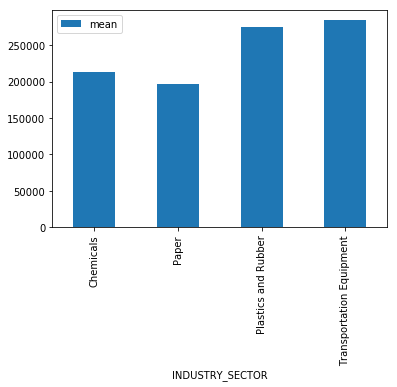

In [41]:
data_common_tri_zillow_centroid3[(data_common_tri_zillow_centroid3.DIST_FROM_CENTROID<1)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

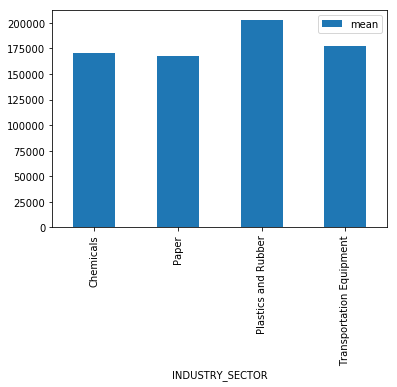

In [42]:
data_common_tri_zillow_centroid3[(data_common_tri_zillow_centroid3.DIST_FROM_CENTROID >2)&(data_common_tri_zillow_centroid3.DIST_FROM_CENTROID <3)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

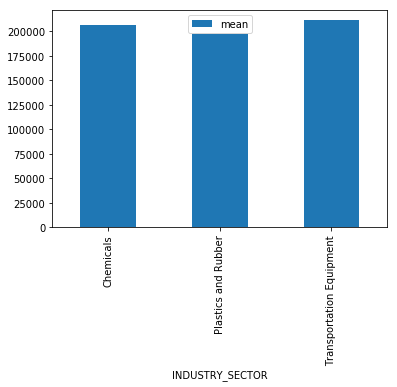

In [43]:
ax = data_common_tri_zillow_centroid3[(data_common_tri_zillow_centroid3.DIST_FROM_CENTROID >3)&(data_common_tri_zillow_centroid3.DIST_FROM_CENTROID <4)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

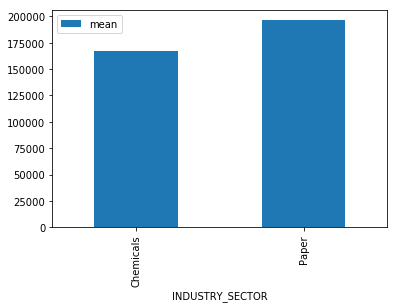

In [44]:
data_common_tri_zillow_centroid3[(data_common_tri_zillow_centroid3.DIST_FROM_CENTROID >5)&(data_common_tri_zillow_centroid3.DIST_FROM_CENTROID <6)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')


It is observed that the industry sector - Chemicals - shows a pattern of increase of house prices as the distance moves farther from the industries.